In [7]:
# -*- coding: utf-8 -*-
import os
import re
import codecs
from string import punctuation

 
def replace_func(input_file,data_name):
    filename = '.\\process\\'+data_name
    outfile = codecs.open(filename , 'w', 'utf-8')
    with codecs.open(input_file, 'r', 'utf-8') as myfile:
        for line in myfile:
            if line == '' or line.startswith('<doc') or line.startswith('</doc'): continue
            outfile.writelines(line)
    outfile.close()
 
 
def run():
    
    data_path = '.\\extracted\\'
    data_names = ['wiki01.txt','wiki02.txt','wiki03.txt']
    for data_name in data_names:
        replace_func(data_path + data_name, data_name)
        print('{0} has been processed !'.format(data_name))
 
    
if __name__ == '__main__':
    run()
 

wiki01.txt has been processed !
wiki02.txt has been processed !
wiki03.txt has been processed !


In [1]:
from gensim.models import Word2Vec
 
model = Word2Vec.load('.\model\wiki.model')
 
testwords = ['人工智能', '梦想', '自动化', '程序员', '银河']
for i in range(5):
    res = model.most_similar(testwords[i])
    print(testwords[i])
    print(res)


d:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
d:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


人工智能
[('人工智慧', 0.7480980157852173), ('AI', 0.7028647065162659), ('智能', 0.6066256761550903), ('专家系统', 0.5803985595703125), ('计算机', 0.5551459193229675), ('计算机技术', 0.5538640022277832), ('人工神经网络', 0.5508993864059448), ('虚拟现实', 0.5497639179229736), ('模式识别', 0.5476998686790466), ('神经网络', 0.5472321510314941)]
梦想
[('愿望', 0.6169852018356323), ('心愿', 0.602506160736084), ('憧憬', 0.5640087127685547), ('渴望', 0.5221301317214966), ('抱负', 0.5166665315628052), ('志向', 0.5155216455459595), ('梦寐以求', 0.4909277558326721), ('人生目标', 0.4861561059951782), ('梦', 0.48563358187675476), ('追梦', 0.4838047921657562)]
自动化
[('自动控制', 0.6061505079269409), ('系统工程', 0.6054563522338867), ('电脑化', 0.5948458909988403), ('智能化', 0.5940191745758057), ('电子计算机', 0.5831822156906128), ('电子化', 0.5784444212913513), ('系统集成', 0.5650191903114319), ('信息系统', 0.5563763380050659), ('计算机技术', 0.5470543503761292), ('无线通讯', 0.5443048477172852)]
程序员
[('开发人员', 0.7258207201957703), ('开发者', 0.7091096639633179), ('编译器', 0.603945791721344), ('系统管理员', 0.5

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    words = ['人工智能', '梦想', '自动化', '程序员', '银河']
    for word in words:
        for sim, _ in model.wv.most_similar(word, topn=40):
            tokens.append(model[sim])
            labels.append(sim)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='center',
                     va='bottom')
    plt.show()

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


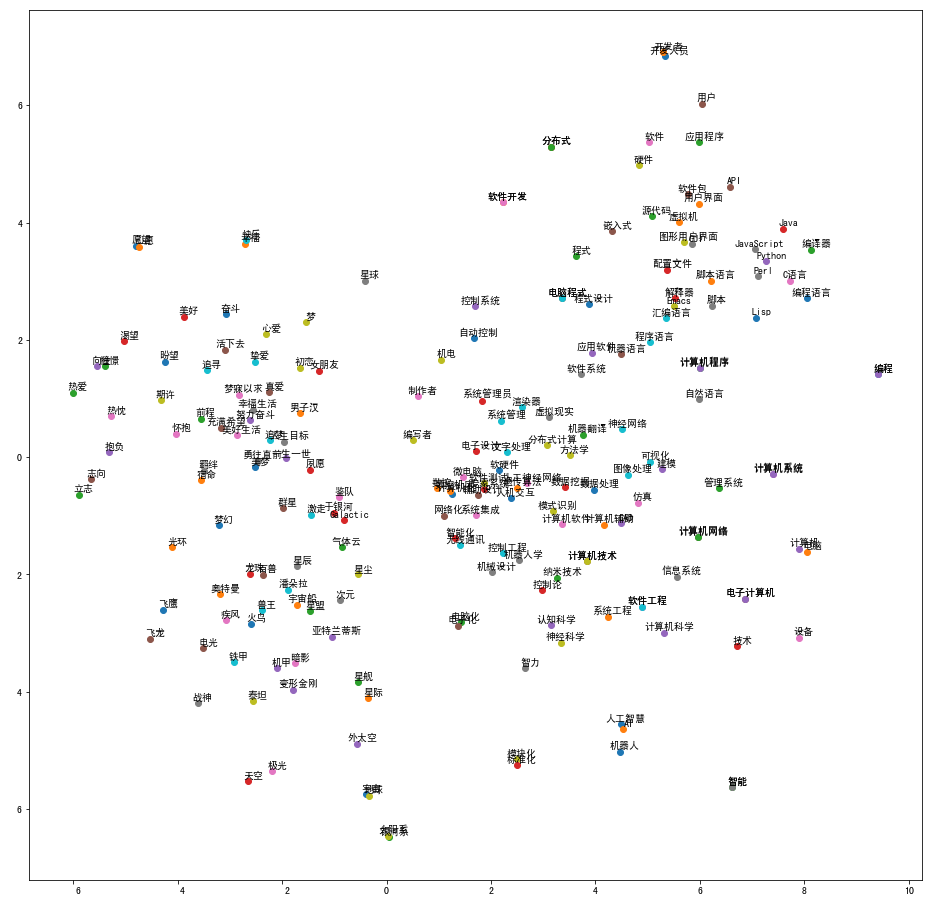

In [11]:
tsne_plot(model)

In [5]:
model.wv.most_similar("说", topn=40)

[('说道', 0.7078069448471069),
 ('却说', 0.6800994873046875),
 ('答道', 0.6403692960739136),
 ('问道', 0.6356428861618042),
 ('指出', 0.6268699169158936),
 ('反问', 0.6180568933486938),
 ('告诉', 0.6154226660728455),
 ('问', 0.6116881966590881),
 ('所说', 0.6065610647201538),
 ('声称', 0.6028034090995789),
 ('时说', 0.5977399349212646),
 ('写道', 0.5904896855354309),
 ('地说', 0.5844831466674805),
 ('中说', 0.5722599029541016),
 ('表示', 0.5665379762649536),
 ('认为', 0.5650402903556824),
 ('说出', 0.564644455909729),
 ('感叹', 0.5632882118225098),
 ('所言', 0.5597952008247375),
 ('喊道', 0.5590440034866333),
 ('宣称', 0.55577552318573),
 ('觉得', 0.5542834997177124),
 ('慨叹', 0.552265465259552),
 ('要说', 0.5520572662353516),
 ('大喊', 0.5485265254974365),
 ('直言', 0.5479878187179565),
 ('大骂', 0.5478135943412781),
 ('文说', 0.5467003583908081),
 ('直说', 0.5465414524078369),
 ('讲', 0.5456514358520508),
 ('答', 0.5418721437454224),
 ('回答', 0.5401966571807861),
 ('说起', 0.5385255813598633),
 ('称', 0.5375468730926514),
 ('辩称', 0.537298321723

2019-08-16 23:46:38,965 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2019-08-16 23:46:38,968 INFO sqlalchemy.engine.base.Engine {}
2019-08-16 23:46:39,017 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2019-08-16 23:46:39,018 INFO sqlalchemy.engine.base.Engine {}
2019-08-16 23:46:39,107 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2019-08-16 23:46:39,109 INFO sqlalchemy.engine.base.Engine {}
2019-08-16 23:46:39,206 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2019-08-16 23:46:39,209 INFO sqlalchemy.engine.base.Engine {}
2019-08-16 23:46:39,256 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2019-08-16 23:46:39,258 INFO sqlalchemy.engine.base.Engine {}
2019-08-16 23:46:39,303 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2019-08-16 23:46:39,304 INFO sqlalchemy.engine.base.E

In [205]:
words = segmentor.segment("我是你的大哥")
print(' '.join(words))

In [178]:
from sqlalchemy import Column, String, create_engine, Integer
from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.declarative import declarative_base
import re
import codecs


# 初始化链接
engine = create_engine('mysql+pymysql://root:AI@2019@ai@rm-8vbwj6507z6465505ro.mysql.zhangbei.rds.aliyuncs.com:3306/stu_db', echo=True)
Base = declarative_base()
DBsession = sessionmaker(bind=engine)
session = DBsession()

# 描述表结构
class News(Base):
    __tablename__ = 'News_chinese'
    id = Column(Integer, primary_key=True)
    author = Column(String(20), nullable=False)
    content = Column(String(), nullable=False)
    feature = Column(String(), nullable=False)
    title = Column(String(64), nullable=False)
    url = Column(nullable=False)

# 数据查询
def Query_Iteration(session):
    news_all = ''

    for new in session.query(News).order_by(News.id):
        news_all += new.content
    return news_all

with codecs.open('new_data1.txt', 'w', encoding='utf-8') as f:

    news_corups = Query_Iteration(session)
    news_corups = news_corups.replace(u'\u3000', u' ')
    news_corups = news_corups.replace(u'\\n', u'\n')
    regex = re.compile(r'\S.*')
    find = regex.findall(news_corups)
    f.write(news_corups)



2019-08-16 22:39:41,626 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2019-08-16 22:39:41,630 INFO sqlalchemy.engine.base.Engine {}
2019-08-16 22:39:41,680 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2019-08-16 22:39:41,682 INFO sqlalchemy.engine.base.Engine {}
2019-08-16 22:39:41,775 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2019-08-16 22:39:41,776 INFO sqlalchemy.engine.base.Engine {}
2019-08-16 22:39:41,879 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2019-08-16 22:39:41,889 INFO sqlalchemy.engine.base.Engine {}
2019-08-16 22:39:41,995 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2019-08-16 22:39:41,995 INFO sqlalchemy.engine.base.Engine {}
2019-08-16 22:39:42,049 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2019-08-16 22:39:42,051 INFO sqlalchemy.engine.base.E

KeyboardInterrupt: 

In [ ]:
D:\Users\PC\PycharmProjects\flask\model\news.model

In [209]:
from gensim.models import Word2Vec
 
model = Word2Vec.load('D:\Users\PC\PycharmProjects\flask\model\news.modell')
news_model_1.most_similar('说', topn=20)


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-209-f373ca325c97>, line 3)